In [79]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress

In [129]:
#Reading CSV File 
ticker_earnings_df = pd.read_csv('Stock_Earnings/Tickers_Earnings.csv')
#This is going to be the parameters to be used
start_date = '2010-12-31'
end_date = '2022-12-31'
ticker_list = ["AAPL","AMZN","CSCO","EBAY","GOOG","IBM","MSFT","NVDA","T","TSLA"]
ticker_earnings_df.head()

,symbol,date,qtr,eps_est,eps,release_time
0,A,2009-05-14,04/2009,NaN,NaN,post
1,A,2009-08-17,07/2009,NaN,NaN,post
2,A,2009-11-13,10/2009,NaN,NaN,pre
3,A,2010-02-12,01/2010,NaN,NaN,pre
4,A,2010-05-17,04/2010,NaN,NaN,post


In [125]:
#Cleaning the data using dates range parameters
ticker_earnings_clean_df['date'] = pd.to_datetime(ticker_earnings_clean_df['date'], format='%Y-%m-%d')
ticker_earnings_filtered_df = ticker_earnings_clean_df[(ticker_earnings_clean_df['date'] >= start_date) & (ticker_earnings_clean_df['date'] <= end_date)]
ticker_earnings_filtered_df.head()

,symbol,date,qtr,eps_est,eps,release_time
7,A,2011-02-14,01/2011,NaN,NaN,post
8,A,2011-05-13,04/2011,NaN,NaN,NaN
9,A,2011-08-15,07/2011,NaN,NaN,post
10,A,2011-11-15,10/2011,NaN,NaN,post
11,A,2012-02-15,01/2012,NaN,NaN,post


In [128]:
#Testing on the TSLA ticker to see if we get the appropiate data
ticker_earnings_filtered_df2=ticker_earnings_filtered_df.rename(columns={'symbol':'Ticker'})
ticker_earnings_filtered_df2[ticker_earnings_filtered_df2['Ticker']=='TSLA']

,Ticker,date,qtr,eps_est,eps,release_time
152358,TSLA,2011-02-15,12/2010,NaN,NaN,post
152359,TSLA,2011-05-04,03/2011,NaN,NaN,post
152360,TSLA,2011-08-03,06/2011,NaN,NaN,post
152361,TSLA,2011-11-02,09/2011,NaN,NaN,NaN
152362,TSLA,2012-02-15,12/2011,NaN,NaN,post
152363,TSLA,2012-05-09,03/2012,NaN,-0.76,post
152364,TSLA,2012-07-25,06/2012,NaN,-0.89,post
152365,TSLA,2012-11-05,09/2012,-0.900,-0.92,pre
152366,TSLA,2013-02-20,12/2012,-0.530,-0.65,post
152367,TSLA,2013-05-08,03/2013,0.010,0.12,post


In [130]:
#Getting the data we need for the tickers to be used
ticker_clean_master = pd.DataFrame(columns=['Ticker','date','qtr','eps_est','eps','release_time'])

for ticker in ticker_list:
    temp = ticker_earnings_filtered_df2[ticker_earnings_filtered_df2["Ticker"] == ticker]
    ticker_clean_master = pd.concat([ticker_clean_master, temp],ignore_index=True)
    
#Checking for missing data, we are not interested in eps_est, instead just the eps values  
ticker_clean_master.isna().sum()

Ticker           0
date             0
qtr              2
eps_est         84
eps             56
release_time    78
dtype: int64

In [114]:
#Preview
ticker_clean_master

,Ticker,date,qtr,eps_est,eps,release_time
0,AAPL,2011-01-18,12/2010,NaN,NaN,post
1,AAPL,2011-04-20,03/2011,NaN,NaN,post
2,AAPL,2011-07-19,06/2011,NaN,NaN,post
3,AAPL,2011-10-18,09/2011,NaN,NaN,post
4,AAPL,2012-01-24,12/2011,NaN,NaN,post
...,...,...,...,...,...,...
411,TSLA,2020-04-29,Q1,-0.357,1.24,NaN
412,TSLA,2020-07-22,Q2,0.032,2.18,NaN
413,TSLA,2020-10-21,Q3,0.569,0.76,NaN
414,TSLA,2021-01-27,Q4,1.032,0.80,post


In [115]:
#Do not Run, For testing only
#ticker_clean_master.to_csv('Tickers_pre_EPS.csv', encoding='utf-8')

In [131]:
#Importing new csv file with missing data
ticker_complete = pd.read_csv('Stock_Earnings/Tickers_EPS.csv')
ticker_complete['date'] = pd.to_datetime(ticker_complete['date'], format='%m/%d/%y')
ticker_complete['Year'] = ticker_complete['date'].dt.to_period('y')
ticker_complete.Year = ticker_complete.Year.astype(str)
ticker_complete
ticker_complete_TSLA = ticker_complete[ticker_complete['Ticker'] == 'TSLA']
ticker_complete


,Ticker,date,qtr,eps_est,eps,release_time,Year
0,AAPL,2011-01-18,Q4,NaN,0.23,post,2011
1,AAPL,2011-04-20,Q1,NaN,0.23,post,2011
2,AAPL,2011-07-19,Q2,NaN,0.28,post,2011
3,AAPL,2011-10-18,Q3,NaN,0.25,post,2011
4,AAPL,2012-01-24,Q4,NaN,0.50,post,2012
...,...,...,...,...,...,...,...
411,TSLA,2020-04-29,Q1,-0.357,1.24,NaN,2020
412,TSLA,2020-07-22,Q2,0.032,2.18,NaN,2020
413,TSLA,2020-10-21,Q3,0.569,0.76,NaN,2020
414,TSLA,2021-01-27,Q4,1.032,0.80,post,2021


In [132]:
#ticker_complete = pd.read_csv('Tickers_EPS.csv')
#ticker_complete['date'] = pd.to_datetime(ticker_complete['date'], format='%m/%d/%y')
#ticker_complete['Year'] = ticker_complete['date'].dt.to_period('y')
ticker_avg_year = ticker_complete.groupby(['Ticker','Year'])['eps'].mean()
ticker_avg_year = ticker_avg_year.to_frame()
ticker_avg_year = ticker_avg_year.reset_index()
ticker_avg_year[ticker_avg_year['Ticker']=='EBAY']

,Ticker,Year,eps
33,EBAY,2011,0.4925
34,EBAY,2012,0.5200
35,EBAY,2013,0.6500
36,EBAY,2014,0.7200
37,EBAY,2015,0.7150
38,EBAY,2016,0.4625
39,EBAY,2017,0.4900
40,EBAY,2018,0.5525
41,EBAY,2019,0.7150
42,EBAY,2020,0.8775


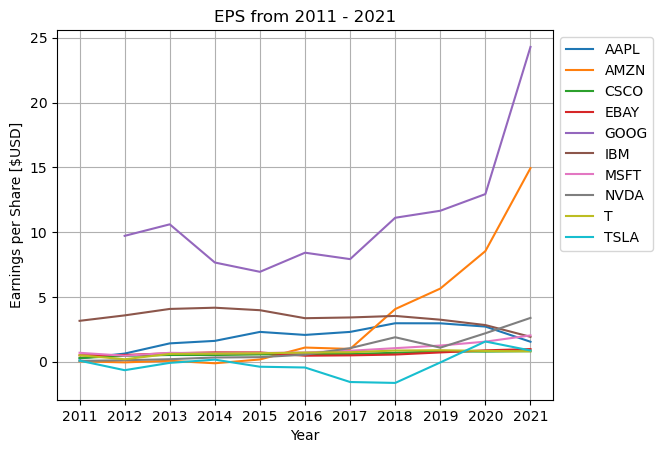

In [134]:
#Average EPS per ticker on the 10 years
ticker_eps_avg = pd.DataFrame(columns=['Ticker','Year','eps'])
fig, ax = plt.subplots()

#Loop to plot each ticker behaviour 
for ticker in ticker_list:
    temp = ticker_avg_year[ticker_avg_year['Ticker'] == ticker]
    temp.Year = temp.Year.astype(str)
    xvalues = temp['Year']
    yvalues = temp['eps']
    plt.plot(xvalues,yvalues)
    plt.legend(ticker_list,loc='upper left',bbox_to_anchor=(1, 1))
    plt.title('EPS from 2011 - 2021')
    
plt.grid()
plt.xlabel('Year')
plt.ylabel('Earnings per Share [$USD]')

plt.plot(labels=True)
plt.show()



In [135]:
#Converting 'Year' column to string for easier manipulation
ticker_avg_year.Year = ticker_avg_year.Year.astype(str)


In [120]:
test1 = ticker_avg_year[['Year','eps','Ticker']]
test1=test1.reset_index()

test1=test1.groupby('Year')['eps'].max()
test1= test1.to_frame()
test1.merge(ticker_avg_year, how='left',on='eps')


,eps,Ticker,Year
0,3.155000,IBM,2011
1,9.713333,GOOG,2012
2,10.602500,GOOG,2013
3,7.655000,GOOG,2014
4,6.937500,GOOG,2015
5,8.412500,GOOG,2016
6,7.917500,GOOG,2017
7,11.110000,GOOG,2018
8,11.650000,GOOG,2019
9,12.937500,GOOG,2020


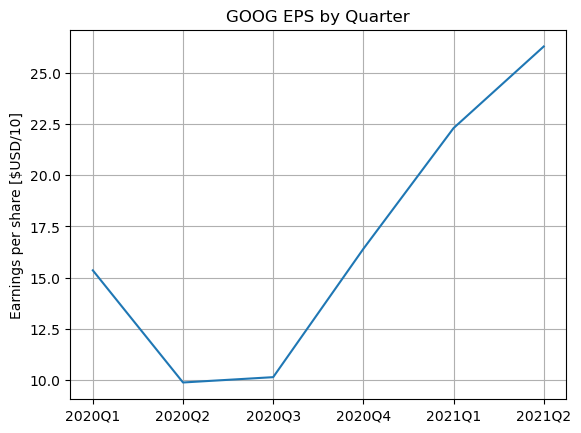

In [136]:
ticker_complete_GOOG = ticker_complete[ticker_complete['Ticker'] == 'GOOG']
ticker_complete_GOOG_clean = ticker_complete_GOOG[ticker_complete_GOOG['date'] >'2019-12-31']
ticker_complete_GOOG_clean['Quarter']=ticker_complete_GOOG_clean['Year'] + ticker_complete_GOOG_clean['qtr']
plt.plot(ticker_complete_GOOG_clean['Quarter'],ticker_complete_GOOG_clean['eps'])

plt.grid()
plt.title("GOOG EPS by Quarter")
plt.ylabel("Earnings per share [$USD/10]")
plt.show()


In [137]:
ticker_complete_GOOG_clean

,Ticker,date,qtr,eps_est,eps,release_time,Year,Quarter
199,GOOG,2020-02-03,Q1,12.586,15.35,NaN,2020,2020Q1
200,GOOG,2020-04-28,Q2,10.380,9.87,NaN,2020,2020Q2
201,GOOG,2020-07-30,Q3,8.342,10.13,NaN,2020,2020Q3
202,GOOG,2020-10-29,Q4,11.209,16.40,NaN,2020,2020Q4
203,GOOG,2021-02-02,Q1,15.986,22.30,NaN,2021,2021Q1
204,GOOG,2021-04-27,Q2,15.876,26.29,NaN,2021,2021Q2


In [138]:
Google_AVG_ClosePrice = pd.read_csv('Stock_Earnings/Google_EPS_AvgPRice_Cor.csv')
Google_AVG_ClosePrice_Mean = Google_AVG_ClosePrice.groupby("Quarter")["Close"].mean()
Google_AVG_ClosePrice_Mean = Google_AVG_ClosePrice_Mean.to_frame()
Google_AVG_ClosePrice_Mean = Google_AVG_ClosePrice_Mean.rename(columns={"Close":"Average Close"})
Google_AVG_ClosePrice_EPS = Google_AVG_ClosePrice_Mean.merge(ticker_complete_GOOG_clean, on="Quarter")
Google_AVG_ClosePrice_EPS.drop(columns=['release_time'])


,Quarter,Average Close,Ticker,date,qtr,eps_est,eps,Year
0,2020Q1,67.848791,GOOG,2020-02-03,Q1,12.586,15.35,2020
1,2020Q2,67.477996,GOOG,2020-04-28,Q2,10.380,9.87,2020
2,2020Q3,76.291469,GOOG,2020-07-30,Q3,8.342,10.13,2020
3,2020Q4,84.365085,GOOG,2020-10-29,Q4,11.209,16.40,2020
4,2021Q1,99.208607,GOOG,2021-02-02,Q1,15.986,22.30,2021
5,2021Q2,119.181961,GOOG,2021-04-27,Q2,15.876,26.29,2021


rvalue:0.9161849722975483


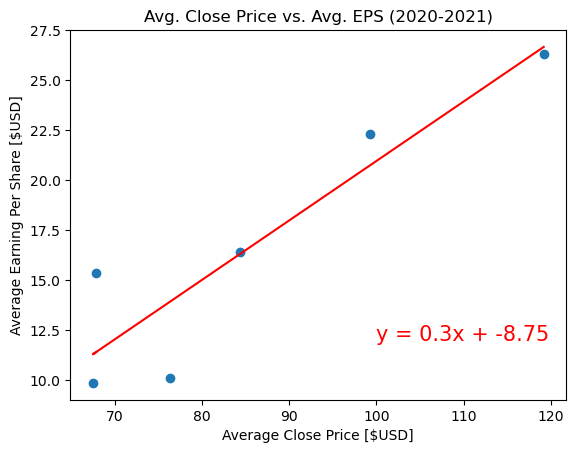

In [139]:
x = Google_AVG_ClosePrice_EPS['Average Close']
y = Google_AVG_ClosePrice_EPS['eps']
plt.scatter(x,y)
plt.xlabel("Average Close Price [$USD]")
plt.ylabel("Average Earning Per Share [$USD]")
(slope,intercept, rvalue, pvalue, stderr)=linregress(x, y)
regress_values= x*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values, color='red')
plt.annotate(line_eq, (100, 12),fontsize = 15, color="red")
print(f"rvalue:{rvalue}")
plt.title("Avg. Close Price vs. Avg. EPS (2020-2021)")
plt.show()